## Question
### Borough to Borough Stats

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
extracted_files = glob.glob('..\\Data\\*\\*\\processed\\*.csv')
df = pd.DataFrame()
list_ = []
for fileName in extracted_files:
    short_df = pd.read_csv(fileName)
    list_.append(short_df)
df = pd.concat(list_)
df = df.rename(columns = {'pickup_area':'Pick-Up', 'dropoff_area':'Dropoff'})

In [3]:
len(df)

150774

In [4]:
group_by_series = df['total_amount'].groupby([df['Pick-Up'], df['Dropoff']]).sum()
group_by_df = group_by_series.to_frame()
group_by_df = group_by_df.reset_index()

In [5]:
reshaped = group_by_df.pivot_table('total_amount', 'Pick-Up', 'Dropoff')
reshaped = reshaped.fillna(0.0)
reshaped = reshaped.round(2)

In [6]:
reshaped

Dropoff,Bronx,Brooklyn,Manhattan,Not Specified,Queens,Staten Island
Pick-Up,,,,,,
Bronx,4328.69,197.78,2930.96,297.14,656.54,0.00
Brooklyn,1184.25,67935.79,40048.17,1654.41,15083.40,51.30
Manhattan,43725.55,161242.94,1360331.61,44659.08,213737.80,2033.20
Not Specified,298.54,952.58,5597.29,57856.98,1309.57,83.68
Queens,8138.49,58872.59,175640.55,9578.50,69512.92,963.15
Staten Island,0.00,46.80,0.00,0.00,0.00,11.80


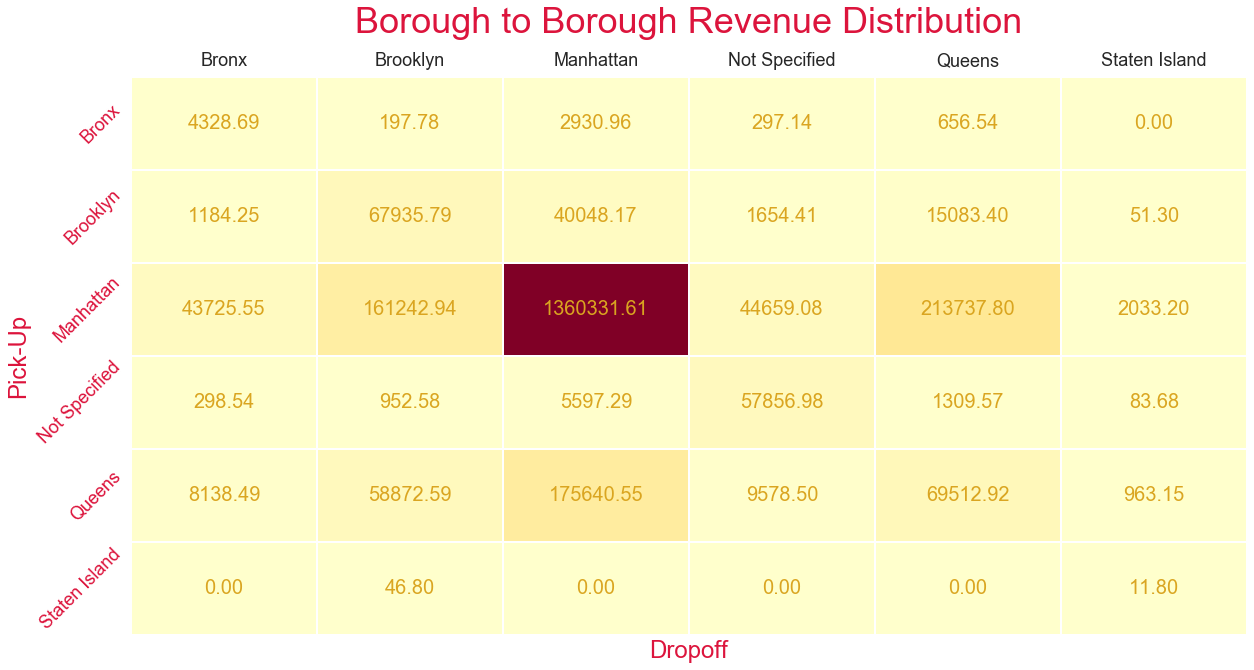

In [8]:
plt.subplots(figsize=(20,10))
cost_heatmap = sns.heatmap(reshaped, annot=True,
                           annot_kws={"size": 20, "color":'#DAA520'},
                           linewidths=.5, fmt='.2f', cmap='YlOrRd',
                           cbar=False)
plt.setp(cost_heatmap.get_xticklabels(), rotation=45, fontsize=14, color='#DC143C')
plt.setp(cost_heatmap.get_yticklabels(), rotation=45, fontsize=14, color='#DC143C')
figure_title = cost_heatmap.set_title('Borough to Borough Revenue Distribution')
figure_title.set_position([.5, 1.07])
cost_heatmap.xaxis.get_label().set_fontsize(24)
cost_heatmap.yaxis.get_label().set_fontsize(24)
cost_heatmap.xaxis.get_label().set_color('#DC143C')
cost_heatmap.yaxis.get_label().set_color('#DC143C')
cost_heatmap.title.set_fontsize(36)
cost_heatmap.title.set_color('#DC143C')
cost_heatmap.xaxis.tick_top()
cost_heatmap.tick_params(axis='x', which='major',labelsize=18)
cost_heatmap.tick_params(axis='y', which='major',labelsize=18)